<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/tasks/task2_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Критерии оценивания:

1. произведена сегментация на уровне предложений (1 балл)
2. произведена сегментация на уровне N-грамм (1 балл)
3. произведена сегментация на уровне слов (1 балл)
4. датасет опубликован на HF Datasets (1 балл)
5. оформлена карточка на HF Datasets (1 балл)
6. в карточке представлена информация о проведенном анализе (3 балла)
7. в карточке представлен частотный анализ слов в виде графика (1 балл)
8. в карточке представлен частотный анализ слов в виде облака (1 балл)

**В комментариях к блокноту нужно обязательно добавить ссылку на ваш датасет**

# Задача 2: Разметка датасета с HF Datasets: статистический анализ и визуализация


    датасет опубликован на HF Datasets (1 балл)
    оформлена карточка на HF Datasets (1 балл)
    в карточке представлена информация о распределении длин предложений (1 балл)
    в карточке представлена информация о распределении длин N-грамм (1 балл)
    в карточке представлена информация о распределении длин слов (1 балл)
    в карточке представлен частотный анализ слов в виде графика (1 балл)
    в карточке представлен частотный анализ слов в виде облака (1 балл)


**Шаг 1**: Установка необходимых библиотек и загрузка текста

In [1]:
# Устанавливаем необходимые библиотеки
!pip install datasets nltk spacy -q

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
tensorflow-intel 2.18.0 requires keras>=3.5.0, but you have keras 2.12.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
# Импорт наших инструментов
import re
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk, spacy

In [50]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Загружаем Spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 799.2 kB/s eta 0:00:16
     - ------------------------------------- 0.5/12.8 MB 799.2 kB/s eta 0:00:16
     -- ------------------------------------ 0.8/12.8 MB 799.2 kB/s eta 0:00:16
     --- ----------------------------------- 1.0/12.8 MB 853.9 kB/s eta 0:00:14
     --- ----------------------------------- 1.3/12.8 MB 919.8 kB/s eta 0:00:13
     ---- ---------------------------------- 1.6/12.8 MB 943.0 kB/s eta 0:00:12
     ---- ---------------------------------- 1.6/12.8 MB 943.0 kB/s eta 0:00:12
     ---- ---------------------------------- 1.6/12.8 MB 943.0 kB/s eta 0:00:12
     ----- --------------------------------- 1.8/12.8 MB 799.2 kB/s eta 


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Подключаем ресурсы NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

**Задание**: загрузите текст для разметки

**Опции**:
1. использовать свой текст
2. использовать текст из задания 1: `https://github.com/vifirsanova/compling/blob/main/tasks/task1/data.txt`

In [51]:
text = 'data.txt'

**Шаг 2**: сегментация

Вы можете использовать любые библиотеки

In [52]:
# выполните здесь код для сегментации на уровне предложений
with open(text, 'r', encoding="utf8") as f:
    readtxt = f.read()
cleaned_text = re.sub(r'\s+', ' ', readtxt).strip()
sentences = re.split(r'(?<=[.!?]) +', cleaned_text)
cleaned_sentences = [re.sub(r'[.!?]+$', '', sentence).strip() for sentence in sentences]
# выполните здесь код для сегментации на уровне слов
pattern = r'\b[\w\'-]+\b'
all_tokens = []
for sentence in cleaned_sentences:
    words = sentence.split()
    for word in words:
        tokens = re.findall(pattern, word.lower())
        all_tokens.extend(tokens)
# выполните здесь код для сегментации на биграмм
bigrams = list(ngrams(all_tokens, 2))

In [77]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
cleaned_tokens = [token for token in all_tokens if token not in stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
"""

ОБРАЗЕЦ ОЖИДАЕМОГО РЕЗУЛЬТАТА ВЫДАЧИ:

- ПРОВЕРЬТЕ ВАШ РЕЗУЛЬТАТ,
- СРАВНИТЕ ЕГО С ОБРАЗЦОМ ПЕРЕД СДАЧЕЙ РАБОТЫ

"""
print("На уровне предложений:\n", cleaned_sentences[:5])
print("На уровне слов:\n", all_tokens[:5])
print("На уровне биграмм:\n", bigrams[:5])

На уровне предложений:
 ['Title: 5 Common SQL Mistakes and How to Avoid Them Ever wondered how to effectively use 5 common sql mistakes and how to avoid them', 'This topic is crucial for developers because it helps in creating efficient and reusable code', "We'll cover the basics and also discuss some advanced techniques", "By the end of this article, you'll have a clear understanding of how to implement this in your projects", "To deepen your understanding, explore the additional resources we've shared"]
На уровне слов:
 ['title', '5', 'common', 'sql', 'mistakes']
На уровне биграмм:
 [('title', '5'), ('5', 'common'), ('common', 'sql'), ('sql', 'mistakes'), ('mistakes', 'and')]


Далее вы должны самостоятельно принять решение о том, как должен выглядеть ваш датафрейм

В датафрейме вы должны представить 3 типа сегментации текста

Используйте pandas, чтобы оформить свой датасет

In [55]:
import pandas as pd
from itertools import zip_longest

merged = list(zip_longest(cleaned_sentences, all_tokens, bigrams))
df = pd.DataFrame(merged, columns=["Sentences", "Words", "Bigrams"])
df[:10]

,Sentences,Words,Bigrams
0,Title: 5 Common SQL Mistakes and How to Avoid ...,title,"(title, 5)"
1,This topic is crucial for developers because i...,5,"(5, common)"
2,We'll cover the basics and also discuss some a...,common,"(common, sql)"
3,"By the end of this article, you'll have a clea...",sql,"(sql, mistakes)"
4,"To deepen your understanding, explore the addi...",mistakes,"(mistakes, and)"
5,Don't hesitate to experiment and learn,and,"(and, how)"
6,Title: Understanding Python Generators If you'...,how,"(how, to)"
7,"Through this blog, we aim to provide a clear e...",to,"(to, avoid)"
8,"If you've been avoiding this topic, now's the ...",avoid,"(avoid, them)"
9,We hope this guide has provided you with a sol...,them,"(them, ever)"


**Шаг 3**:

1. произведите любые 3 типа статистического анализа, используйте образцы ниже
2. опишите, какую информацию вы можете получить на основе проведенного анализа
3. далее: оформите результаты вашего анализа в карточке датасета

**1. Анализ уникальности данных**

- **Доля уникальных слов:** Рассчитать процент уникальных слов в корпусе.
- **Коэффициент лексического разнообразия (Type-Token Ratio, TTR):** Отношение числа уникальных слов к общему количеству слов.

```python
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)
```

**2. Анализ биграмм и триграмм**
- Построить частотное распределение биграмм и триграмм.
- Выделить наиболее часто встречающиеся сочетания.

```python
trigrams = list(ngrams(words, 3))
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)
```

**3. Анализ распределений**

- Построить гистограммы для:
  - Длин предложений.
  - Длин слов.
  - Длин n-грамм.
- Вычислить медиану, стандартное отклонение, и квартили для распределений.

```python
import numpy as np

mean_sentence_length = np.mean(sentence_lengths)
std_sentence_length = np.std(sentence_lengths)
median_sentence_length = np.median(sentence_lengths)
quartiles_sentence_length = np.percentile(sentence_lengths, [25, 50, 75])
```

**4. Анализ частоты POS-тегов**

Использовать библиотеку `spacy` для разметки текста на части речи (POS tagging) и выделения наиболее часто встречающихся POS-тегов.

```python
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(data)
pos_counts = Counter([token.pos_ for token in doc])
```

**5. Анализ семантического поля**

- Использовать WordNet из `nltk` для анализа семантической близости между словами.
- Построить семантическую сеть, выделив связанные слова и частотные значения.

```python
from nltk.corpus import wordnet

synonyms = []
for word in unique_words:
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
```

**6. Анализ совместной встречаемости**
- Создать матрицу ко-частотности слов для анализа совместного появления терминов.

```python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(sentences)
co_occurrence_matrix = (X.T * X).toarray()
```

**7. TF-IDF**

Рассчитать значения TF-IDF для слов, чтобы определить важные термины в тексте.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
feature_names = tfidf_vectorizer.get_feature_names_out()
```

In [73]:
# Анализ лексического разнообразия: метрики TTR и HLR
from collections import Counter
unique_words = set(all_tokens)
ttr = len(unique_words) / len(all_tokens)
token_count = Counter(all_tokens)
hapax = [token for token, count in token_count.items() if count == 1]
hlr = len(hapax) / len(unique_words)
print(f'TTR: {ttr}, HLR: {hlr}')

TTR: 0.00300578364055956, HLR: 0.0


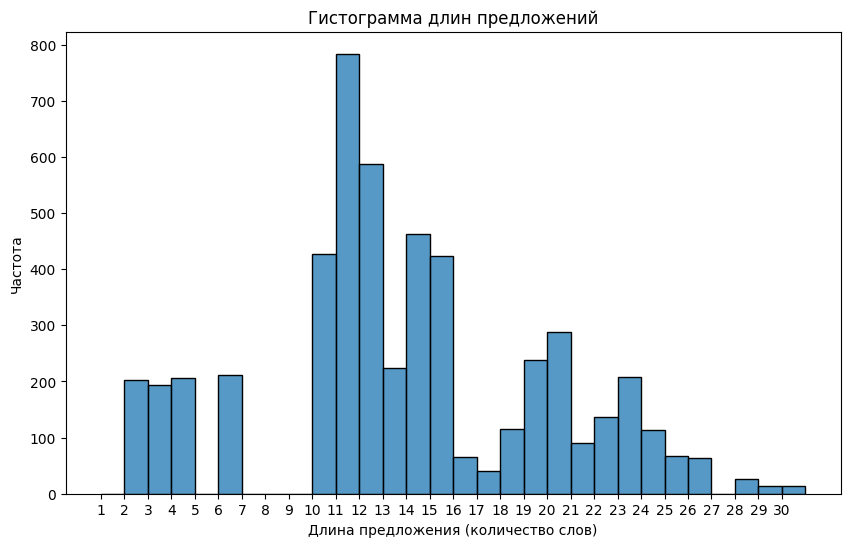

In [87]:
import seaborn as sb
sentence_lengths = [len(sentence.split()) for sentence in cleaned_sentences]
plt.figure(figsize=(10, 6))
sb.histplot(sentence_lengths, bins=range(1, max(sentence_lengths) + 2), kde=False)
plt.title('Гистограмма длин предложений')
plt.xlabel('Длина предложения (количество слов)')
plt.ylabel('Частота')
plt.xticks(range(1, max(sentence_lengths) + 1))
plt.savefig('sentence_len.png')
plt.show()

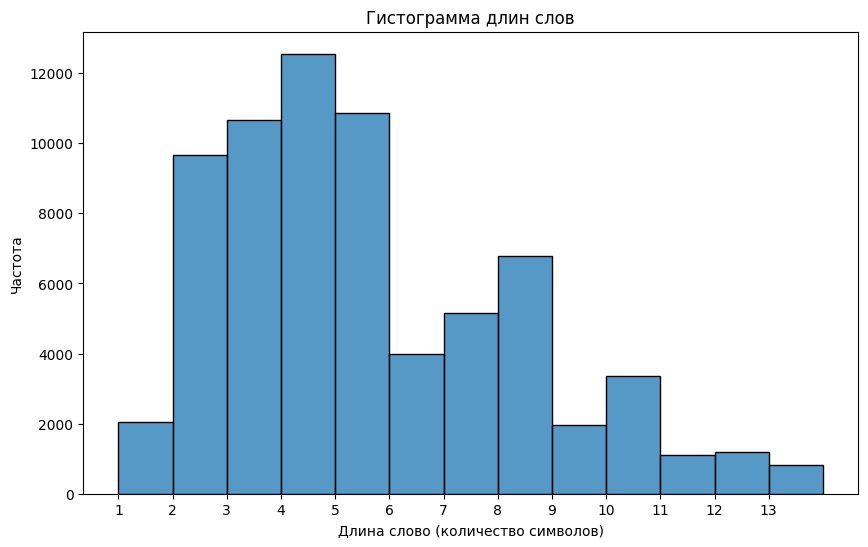

In [88]:
token_lengths = [len(token) for token in all_tokens]
plt.figure(figsize=(10, 6))
sb.histplot(token_lengths, bins=range(1, max(token_lengths) + 2), kde=False)
plt.title('Гистограмма длин слов')
plt.xlabel('Длина слово (количество символов)')
plt.ylabel('Частота')
plt.xticks(range(1, max(token_lengths) + 1))
plt.savefig('word_len.png')
plt.show()

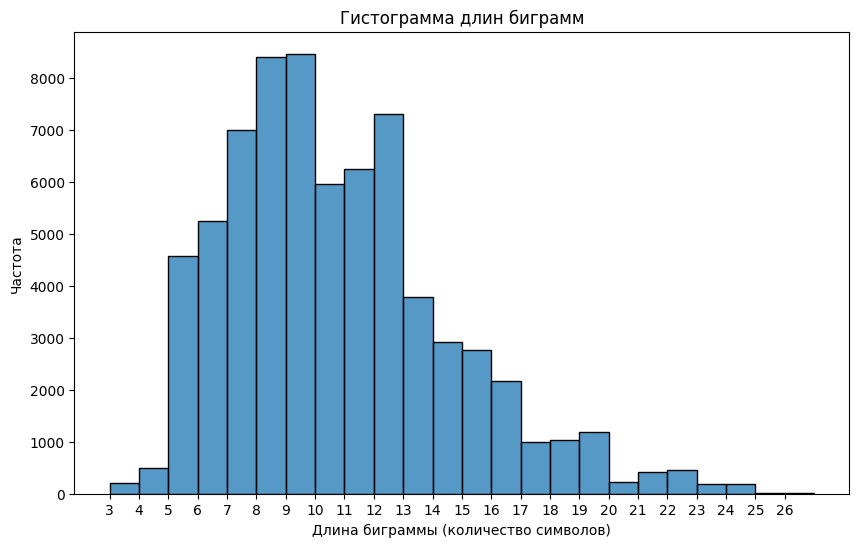

In [89]:
bigram_lengths = [len(word1) + len(word2) for word1, word2 in bigrams]
plt.figure(figsize=(10, 6))
sb.histplot(bigram_lengths, bins=range(min(bigram_lengths), max(bigram_lengths) + 2), kde=False)
plt.title('Гистограмма длин биграмм')
plt.xlabel('Длина биграммы (количество символов)')
plt.ylabel('Частота')
plt.xticks(range(min(bigram_lengths), max(bigram_lengths) + 1))
plt.savefig('ngram_len.png')
plt.show()

In [43]:
# Анализ частоты POS-тегов
doc = nlp(readtxt)
pos_counts = Counter([token.pos_ for token in doc])

In [62]:
pos_stats = dict(pos_counts)
pos_stats

{'NOUN': 17531,
 'PUNCT': 9910,
 'NUM': 380,
 'PROPN': 2327,
 'CCONJ': 2419,
 'SCONJ': 1793,
 'PART': 3121,
 'VERB': 12414,
 'PRON': 7291,
 'SPACE': 4000,
 'ADV': 1516,
 'ADJ': 5845,
 'DET': 6892,
 'AUX': 4150,
 'ADP': 8473}

In [63]:
# Анализ совместной встречаемости
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(cleaned_sentences)
co_occurence_matrix = (X.T * X).toarray()

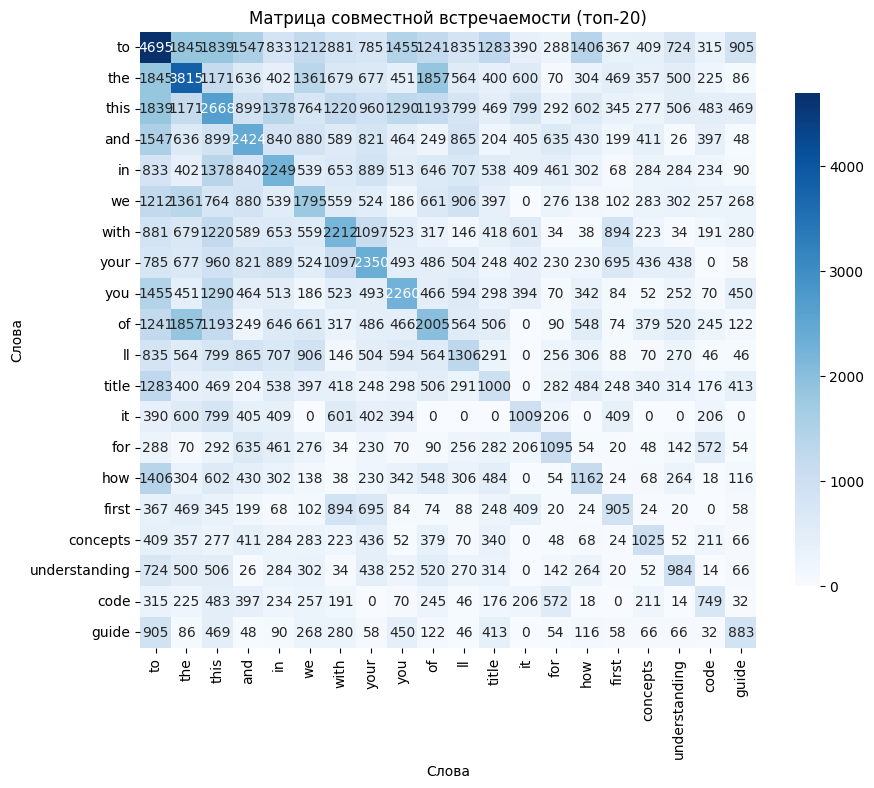

In [90]:
# Визуализация матрицы совместной встречаемости
words = vectorizer.get_feature_names_out()
co_occurrence_df = pd.DataFrame(co_occurence_matrix, index=words, columns=words)
word_frequencies = co_occurrence_df.sum(axis=1)
top_20_words = word_frequencies.nlargest(20).index
top_20_co_occurrence_df = co_occurrence_df.loc[top_20_words, top_20_words]
plt.figure(figsize=(10, 8))
sb.heatmap(top_20_co_occurrence_df, cmap='Blues', annot=True, fmt='d', square=True, cbar_kws={"shrink": .8})
plt.title('Матрица совместной встречаемости (топ-20)')
plt.xlabel('Слова')
plt.ylabel('Слова')
plt.savefig('coocurence_matrix.png')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27772\7975235.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='POS_tag', y='Frequency', data=pos_df, palette='viridis')


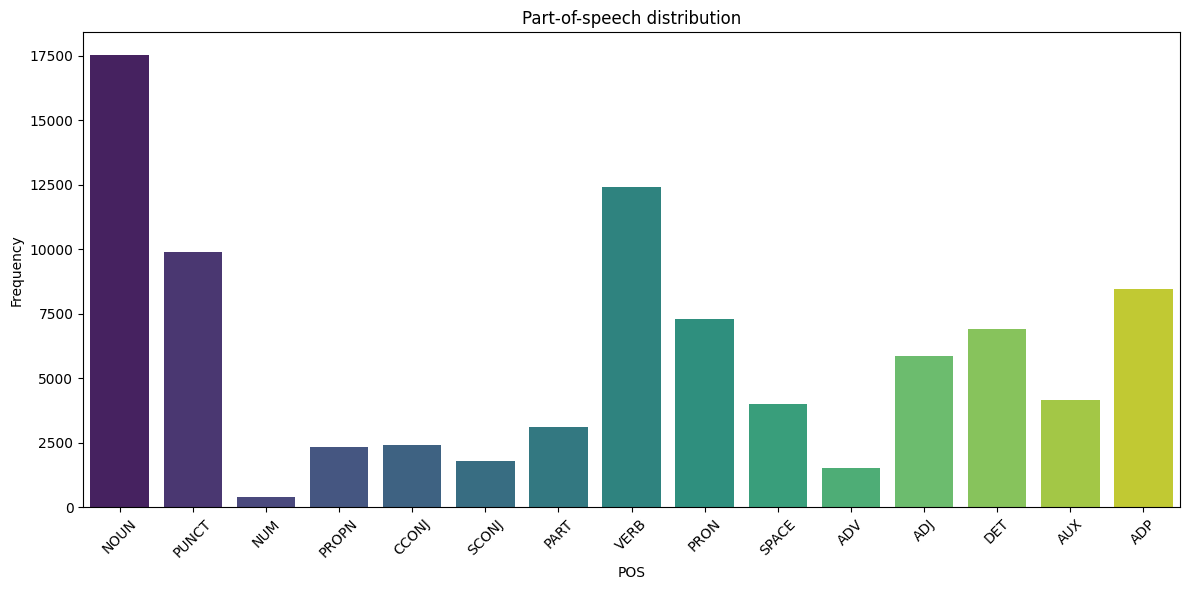

In [91]:
# Визуализация частоты POS-тегов
import seaborn as sb
import matplotlib.pyplot as plt

pos_df = pd.DataFrame(list(pos_stats.items()), columns=["POS_tag", "Frequency"])
plt.figure(figsize=(12, 6))
sb.barplot(x='POS_tag', y='Frequency', data=pos_df, palette='viridis')
plt.title('Part-of-speech distribution')
plt.xlabel('POS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pos_distribution.png')
plt.show()

**Шаг 4**: визуализируйте данные по образцу

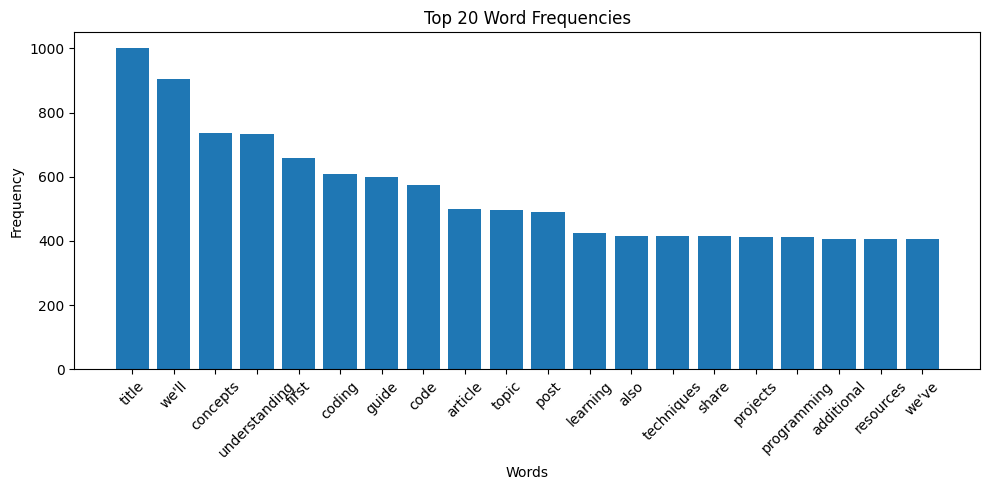

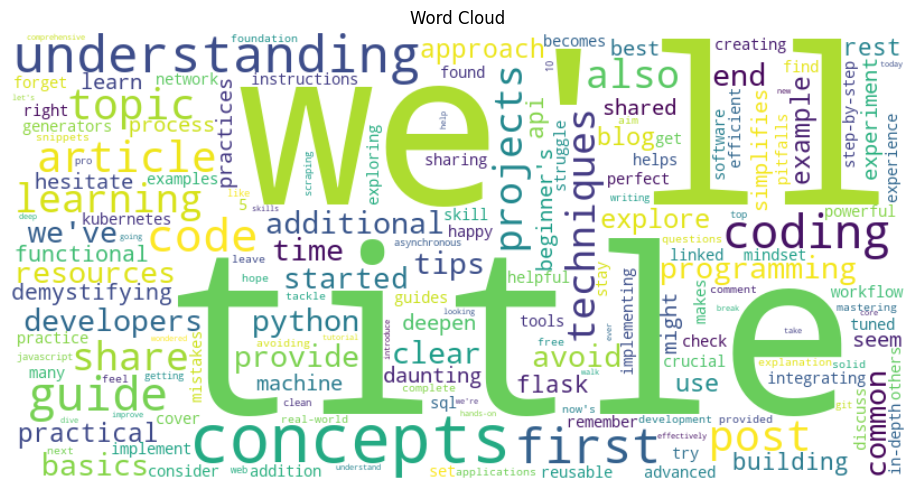

In [78]:
# Word Frequency Plot
cleaned_token_count = Counter(cleaned_tokens)
plt.figure(figsize=(10, 5))
plt.bar(*zip(*cleaned_token_count.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("word_frequency_plot.png")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cleaned_token_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

**Шаг 5**: отправляем на HF Datasets сегментированные данные и оформляем карточку

Что должно быть представлено в карточке:

- результат статистического анализа 3-х типов
- выводы по проведенному анализу
  - какой анализ был проведен?
  - в чем заключается основная идея этого анализа и зачем он нужен?
  - какие тренды удалось выявить?
- гистограмма
- облако слов

In [79]:
# Создаем датасет
from datasets import Dataset
dataset = Dataset.from_pandas(df)

dataset.push_to_hub("segmented_dataset", token="my_token")

# просмотр результатов
dataset

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/71 [00:00<?, ?ba/s]

Dataset({
    features: ['Sentences', 'Words', 'Bigrams'],
    num_rows: 70198
})